### Description
In this notebook load precomputed LID estimate and analyse the variance for differnt batch sizes and k.

In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,roc_auc_score,auc

/home/jungj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10000, 32, 32, 3)
(10000, 32, 32, 3)


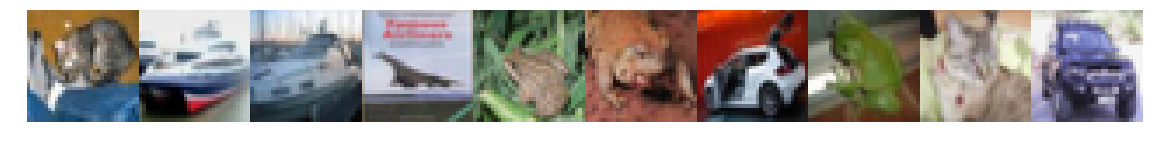

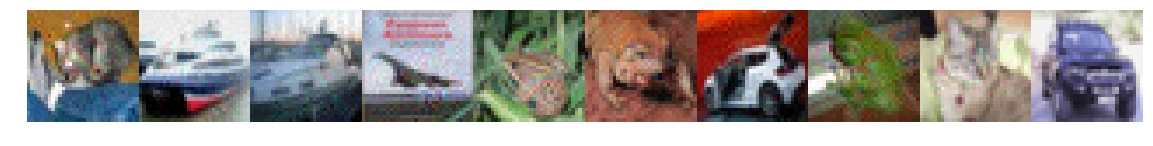

In [2]:
# load CIFAR images and some adversarial images (as usual)
real = np.array(h5py.File('forks/nn_breaking_detection/adv_ex_10000.h5','r')['real'])
print(real.shape)
real_scaled = real - real.min()
plt.figure(figsize=(20,20))
plt.imshow(np.concatenate([real_scaled[i] for i in range(10)], axis=1))
plt.axis('off')

adv_johannes = np.array(h5py.File('forks/nn_breaking_detection/adv_ex_10000.h5','r')['adv'])
print(adv_johannes.shape)
adv_johannes_scaled = adv_johannes - adv_johannes.min()
plt.figure(figsize=(20,20))
plt.imshow(np.concatenate([adv_johannes_scaled[i] for i in range(10)], axis=1))
plt.axis('off')
adv = adv_johannes

In [3]:
df_pre10 = pd.read_pickle("lid_presoftmax_10")
df_pre100 = pd.read_pickle("lid_presoftmax_100")
df_pre1000 = pd.read_pickle("lid_presoftmax_1000")
df_post10 = pd.read_pickle("lid_postsoftmax_10")

print(len(df_pre100))
df_pre100.head()

49400000


,image,group,batch_size,k,run,lid
0,2446,adv,10000,9000,0,3.476485
1,2446,real,10000,9000,0,2.623526
2,2446,adv,10000,8000,0,4.012423
3,2446,real,10000,8000,0,2.889898
4,2446,adv,10000,7000,0,4.365027


In [4]:
df = df_pre100
# get indices for unique images
df.image.unique()

array([2446, 7951, 6004, 8806, 6378, 5466, 7085, 3066, 4931, 5623, 8335,
       2338,  408, 6239, 6050,  275, 7802, 7782, 6872, 1904,  183, 5234,
       3831, 9588,  305, 5752,  745, 2252, 7025, 8412, 1427, 8739, 2246,
       8241, 5832, 2096, 5338, 4350, 7818, 8504, 2801, 2464, 8370, 3234,
       7337, 8330, 4378, 9879, 5267, 6455, 8965, 3232, 5955, 6968, 7972,
       3779, 3442, 7451, 1390,   54, 1545, 9363, 5777, 3098, 2383, 4780,
       2345, 3361, 3822,  468, 6757, 2838, 5855, 2780, 6102, 6249, 2990,
       3471, 9245, 8927, 8015, 9120, 5870, 2170,  648, 5922, 5231, 2390,
       2352, 9194, 9536, 2457, 7502, 1349, 6204, 6986, 6797, 6397, 8503,
       9945])

### different batch sizes for k = 20

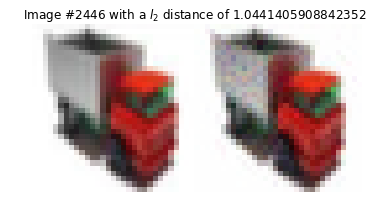

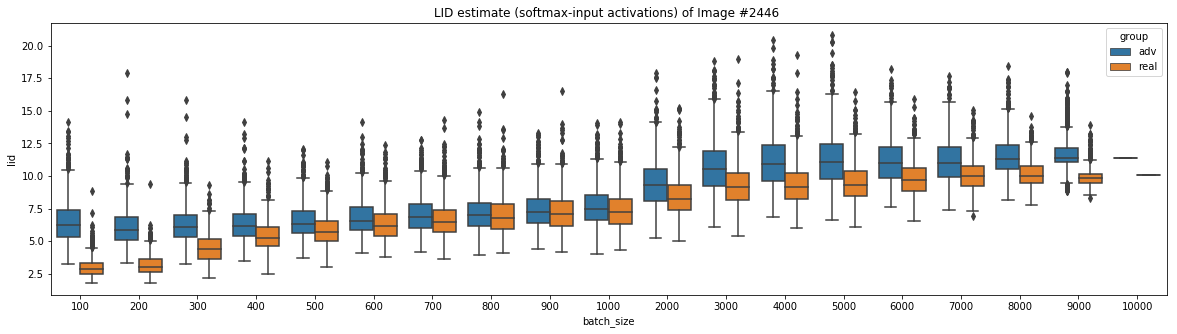

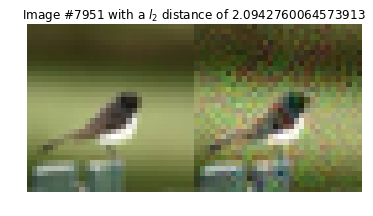

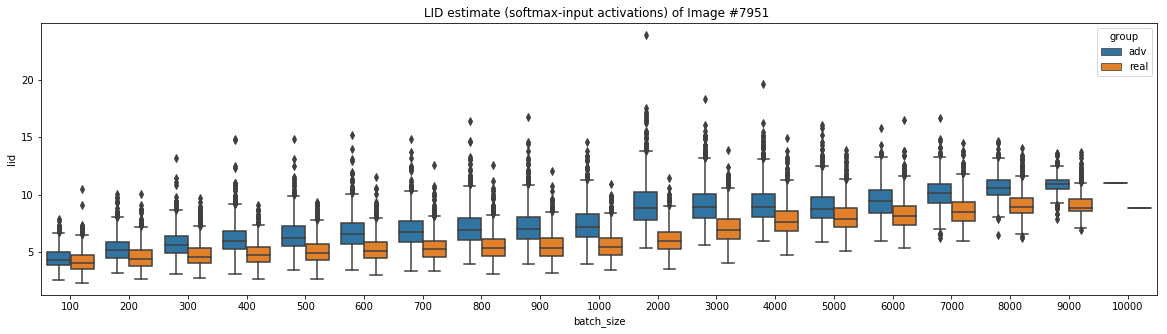

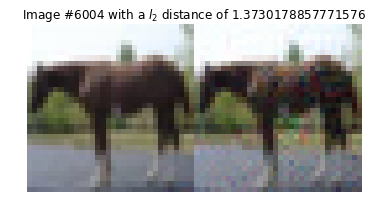

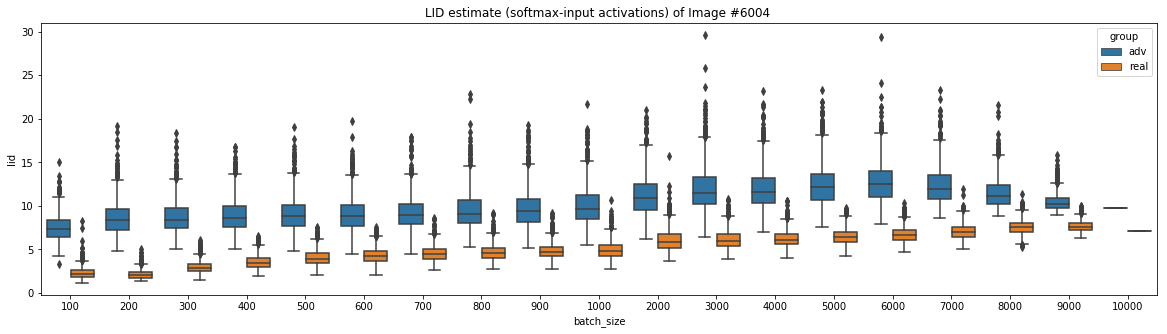

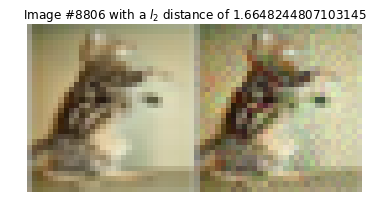

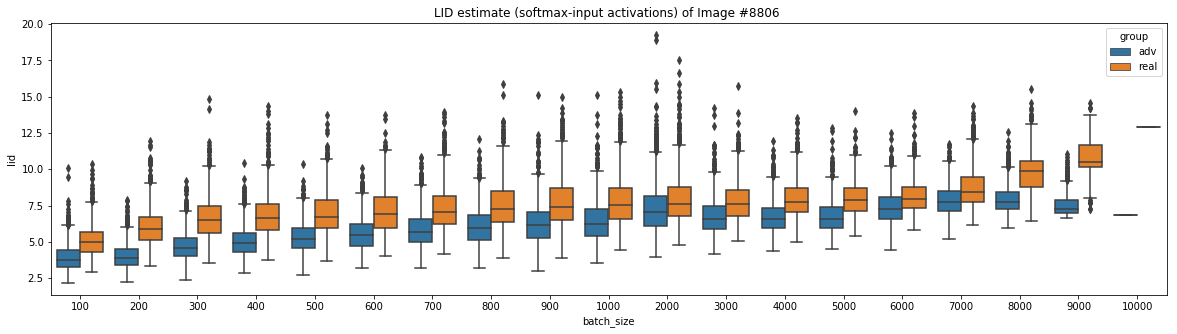

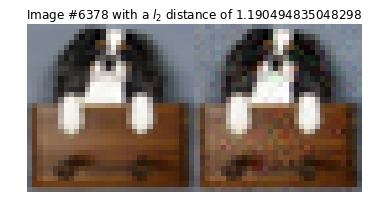

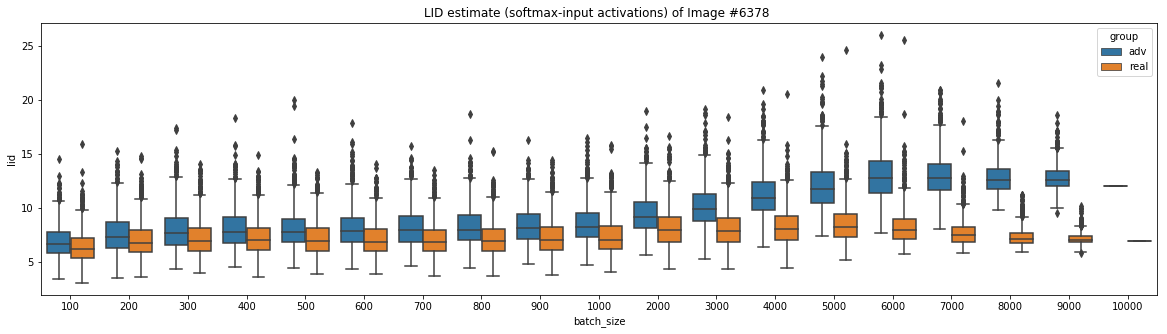

In [5]:
# plot some images, distored versions and histograms
for im in df.image.unique()[:5]:
    real_im = real_scaled[im]
    adv_im = adv_johannes_scaled[im]
    dist = np.sqrt(np.sum(np.square(real_im-adv_im)))
    
    plt.figure()
    plt.title("Image #{} with a $l_2$ distance of {}".format(im,dist))
    plt.imshow(np.concatenate([real_im,adv_im],axis=1))
    plt.axis('off')
    plt.savefig('l2_{}.png'.format(im))
    
    
    data = df.query('image == {} & k == 20'.format(im))

    plt.figure(figsize=(20,5))
    plt.title("LID estimate (softmax-input activations) of Image #{} ".format(im))
    sns.boxplot(x='batch_size',y='lid',data=data,hue='group')
    plt.savefig('hist_k20_{}.png'.format(im))

    plt.show()

### different batch sizes for k = 100

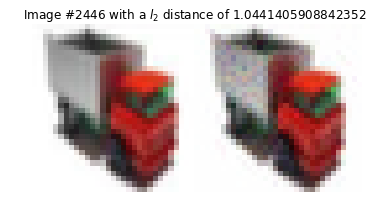

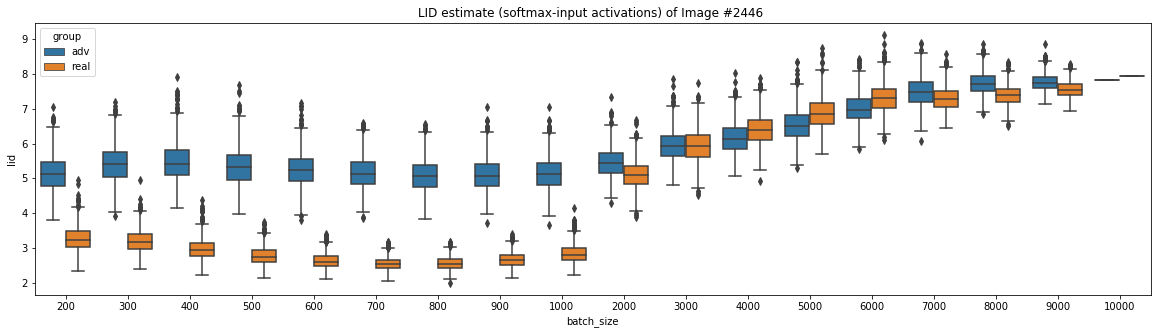

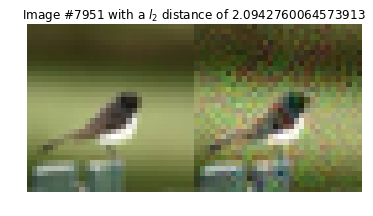

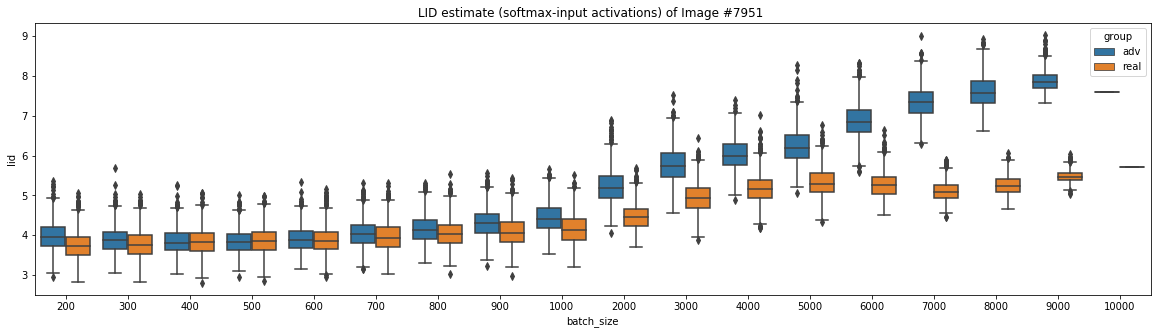

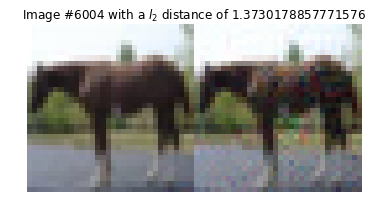

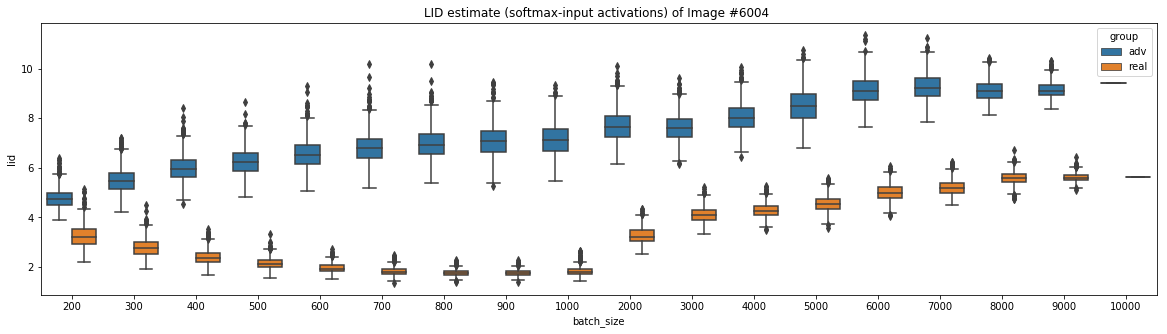

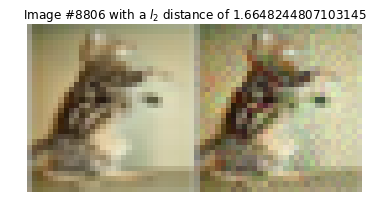

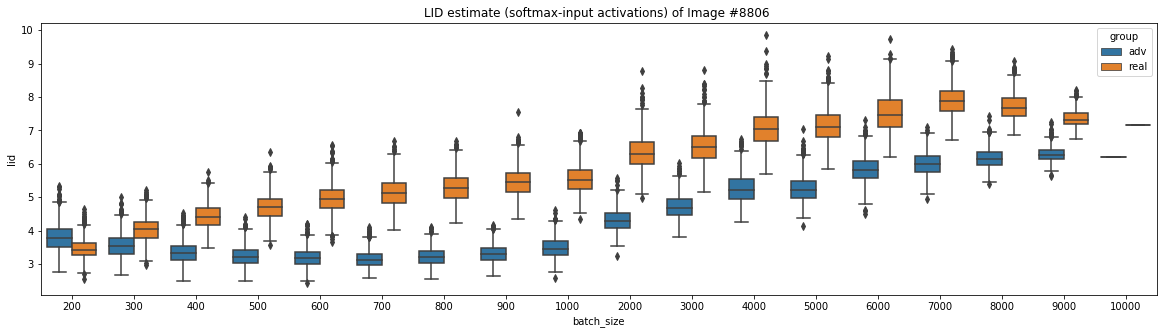

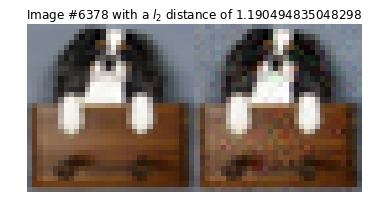

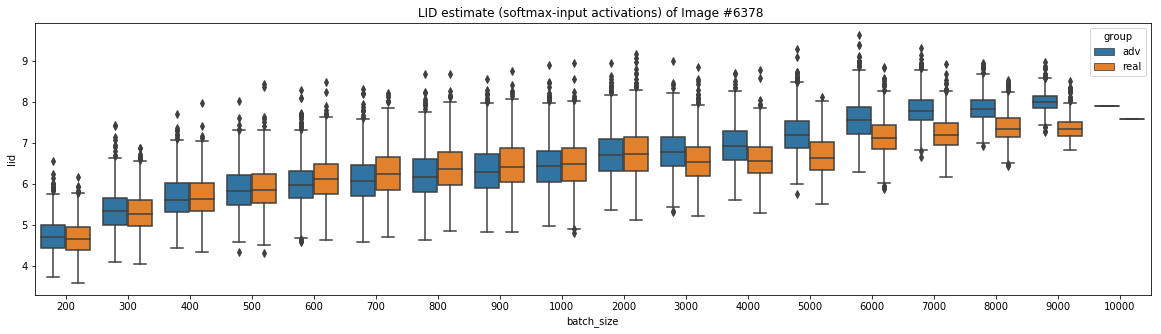

In [6]:
# plot some images, distored versions and histograms
for im in df.image.unique()[:5]:
    real_im = real_scaled[im]
    adv_im = adv_johannes_scaled[im]
    dist = np.sqrt(np.sum(np.square(real_im-adv_im)))
    
    plt.figure()
    plt.title("Image #{} with a $l_2$ distance of {}".format(im,dist))
    plt.imshow(np.concatenate([real_im,adv_im],axis=1))
    plt.axis('off')
    
    
    data = df.query('image == {} & k == 100'.format(im))

    plt.figure(figsize=(20,5))
    plt.title("LID estimate (softmax-input activations) of Image #{} ".format(im))
    sns.boxplot(x='batch_size',y='lid',data=data,hue='group')
    plt.savefig('hist_k100_{}.png'.format(im))

    plt.show()

### different batch sizes for k = batch_size/5

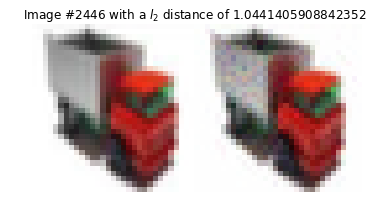

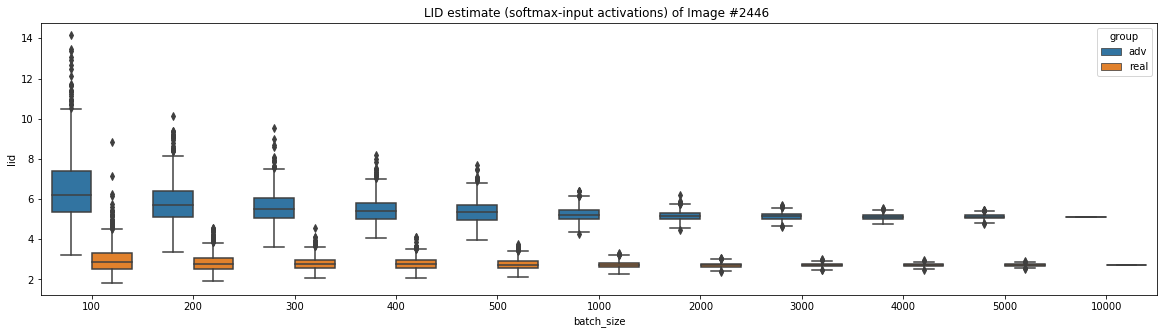

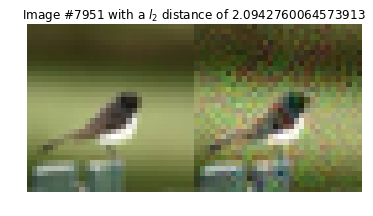

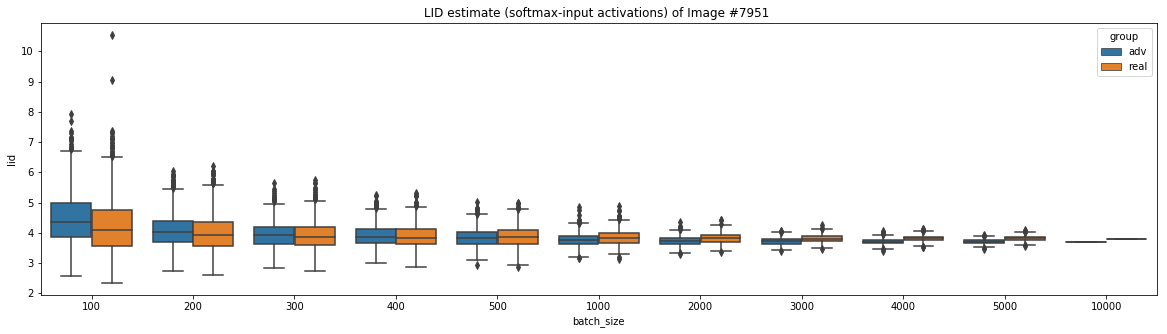

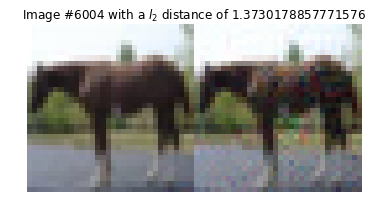

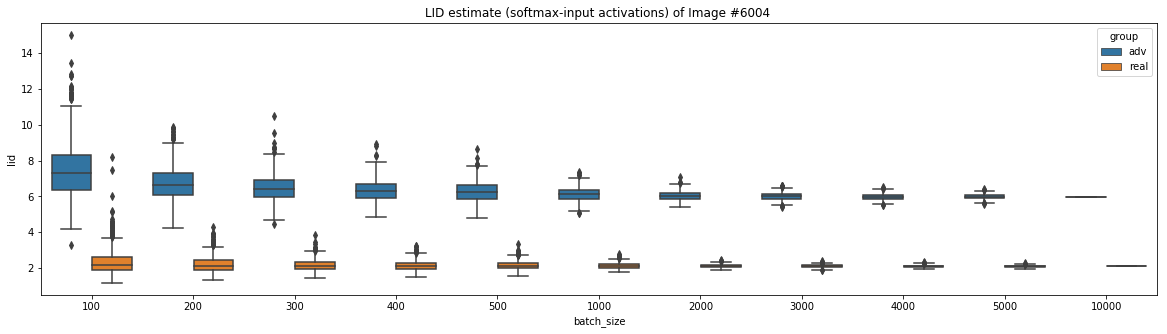

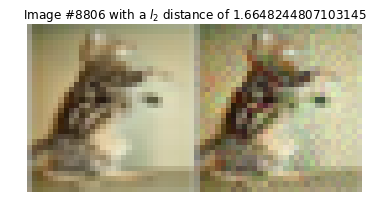

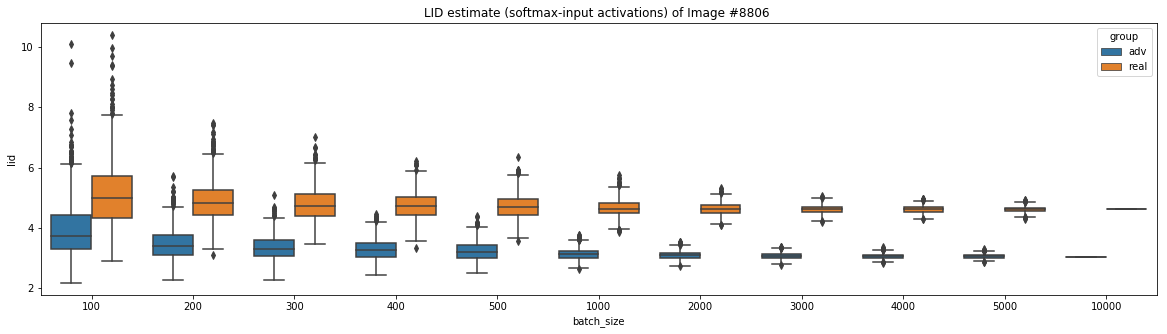

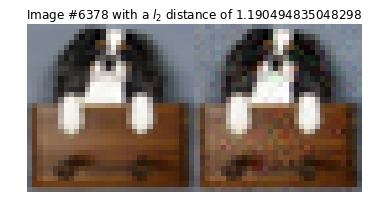

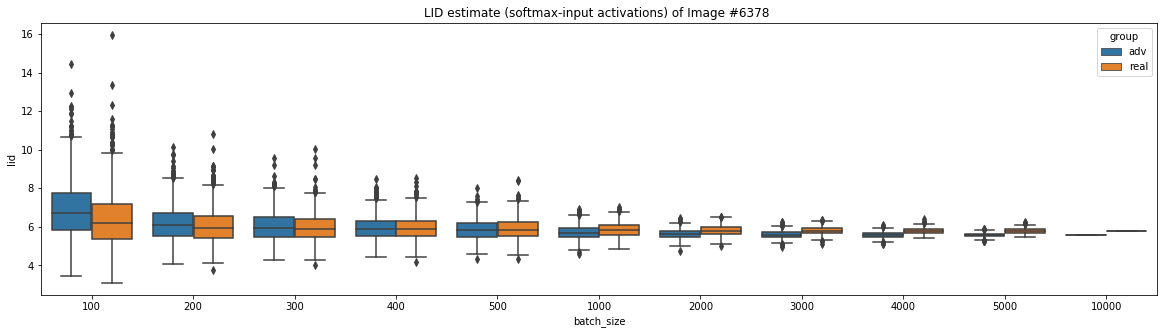

In [7]:
for im in df.image.unique():
    real_im = real_scaled[im]
    adv_im = adv_johannes_scaled[im]
    dist = np.sqrt(np.sum(np.square(real_im-adv_im)))
    
    plt.figure()
    plt.title("Image #{} with a $l_2$ distance of {}".format(im,dist))
    plt.imshow(np.concatenate([real_im,adv_im],axis=1))
    plt.axis('off')
    data = df.query('image == {} & k == batch_size/5'.format(im))

    plt.figure(figsize=(20,5))
    plt.title("LID estimate (softmax-input activations) of Image #{} ".format(im))
    sns.boxplot(x='batch_size',y='lid',data=data,hue='group')
    plt.savefig('hist_k-ratio_{}.png'.format(im))

    plt.show()

### different k for batch size = 1000

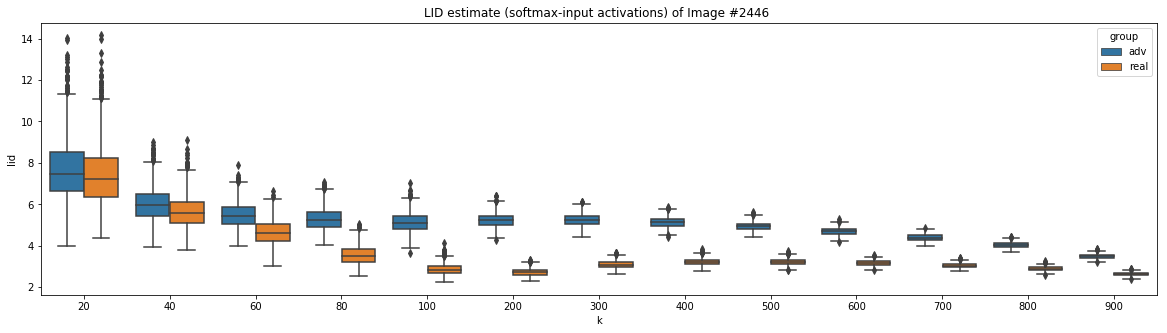

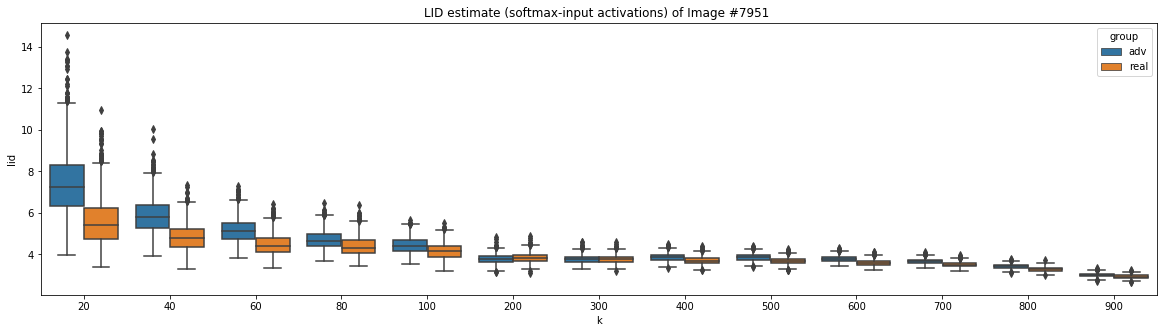

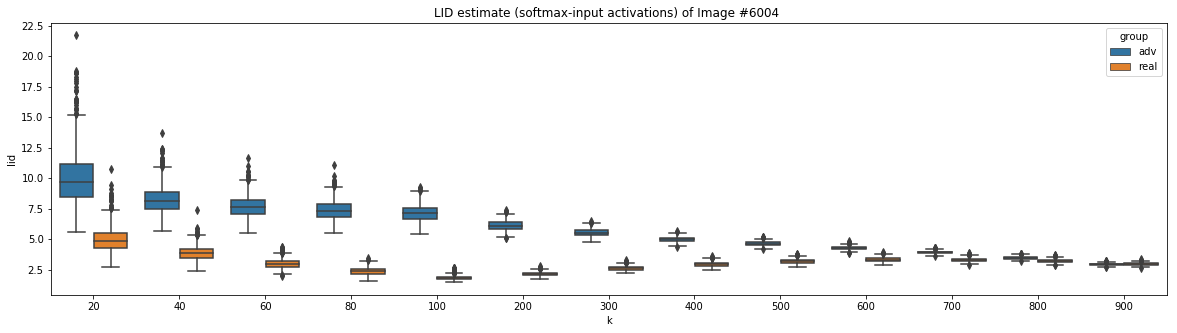

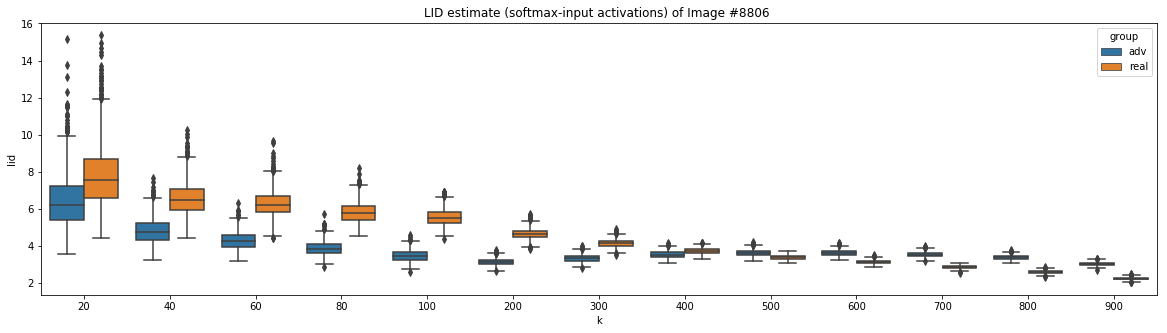

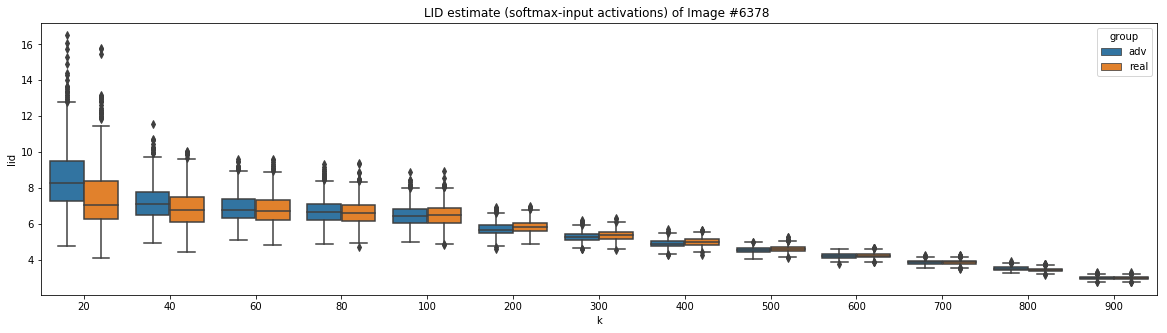

In [8]:
# plot some images, distored versions and histograms
for im in df.image.unique()[:5]:
    data = df.query('image == {} & batch_size == 1000'.format(im))

    plt.figure(figsize=(20,5))
    plt.title("LID estimate (softmax-input activations) of Image #{} ".format(im))
    sns.boxplot(x='k',y='lid',data=data,hue='group')
    
#     sns.violinplot(x="k", y="lid", hue="group", data=data, split=True,
#                inner="quart")

    plt.show()